# Deep Learning project - IPSI3

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

# Directories for data
DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

# Data Augmentation
datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Réduire légèrement la rotation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

test_generator = datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    color_mode='rgb'
)

# Baseline Model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

# Initial Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


/opt/anaconda3/envs/deep/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,630,634 (6.22 MB)

 Trainable params: 1,630,634 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1667 - loss: 2.2067 - val_accuracy: 0.3000 - val_loss: 1.8617 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3975 - loss: 1.5622 - val_accuracy: 0.3200 - val_loss: 1.8155 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4973 - loss: 1.3642 - val_accuracy: 0.5300 - val_loss: 1.4503 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5988 - loss: 1.1350 - val_accuracy: 0.4650 - val_loss: 1.5106 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5451 - loss: 1.1591 - val_accuracy: 0.5300 - val_loss: 1.4028 - learning_rate: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6152 - loss: 1.0398 - val_accuracy: 0.5750 - val_loss: 1.2324 - learning_rate: 0.0010
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6357 - loss: 1.0004 - val_acc

KeyboardInterrupt: 

# Changes made to the base model

- Augment the data with random rotation, zoom, shift, shear, flip, and brightness
- Use a decay on the learning rate
- Use more layers (Conv, pooling and dense)
- Use dropout on dense layer
- Use early stopping just in case
- Use Adam

---
- See if momentum could be useful
- Try batch norm
- Try weight decay

---
- 70% is good with a simple model, so we can try to use a pre-trained model

# ResNet50

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 14,713,738 (56.13 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

Epoch 1/20


/opt/anaconda3/envs/deep/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.1383 - loss: 2.3512 - val_accuracy: 0.0800 - val_loss: 2.4202 - learning_rate: 1.0000e-04
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.2310 - loss: 2.0998 - val_accuracy: 0.1000 - val_loss: 2.3063 - learning_rate: 1.0000e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.2326 - loss: 2.0922 - val_accuracy: 0.1750 - val_loss: 2.2143 - learning_rate: 1.0000e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.2744 - loss: 2.0340 - val_accuracy: 0.2750 - val_loss: 2.0531 - learning_rate: 1.0000e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.2793 - loss: 1.9954 - val_accuracy: 0.2500 - val_loss: 2.0704 - learning_rate: 1.0000e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 220ms/step - accuracy: 0.3388 - loss: 1.9473 - val_accuracy: 0.1850 - val_loss: 2.0102 - learning_rate: 1.0000e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - accuracy: 0.3739 - l

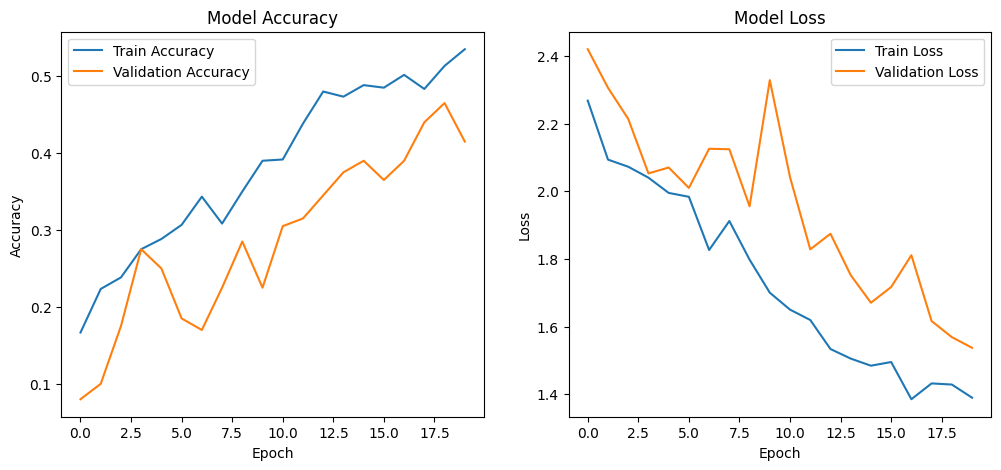

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4296 - loss: 1.4961
Test Loss: 1.5374
Test Accuracy: 0.4150


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

DATA_DIR = 'data/flowers/'  
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagenerator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

validation_generator = validation_datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=False,
    color_mode='rgb'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers[:-30]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(train_generator.class_indices), activation='softmax') 
])

model.compile(
    optimizer=Adam(learning_rate=1e-6), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

model.summary()

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# MobilNet

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 1,371,338 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.1047 - loss: 2.9010 - val_accuracy: 0.0900 - val_loss: 2.8482 - learning_rate: 1.0000e-05
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1344 - loss: 2.6124 - val_accuracy: 0.1400 - val_loss: 2.5571 - learning_rate: 1.0000e-05
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1813 - loss: 2.2864 - val_accuracy: 0.1750 - val_loss: 2.3204 - learning_rate: 1.0000e-05
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.2628 - loss: 2.0730 - val_accuracy: 0.2950 - val_loss: 2.1154 - learning_rate: 1.0000e-05
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3140 - loss: 1.9179 - val_accuracy: 0.3350 - val_loss: 1.9432 - learning_rate: 1.0000e-05
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4098 - loss: 1.7604 - val_accuracy: 0.3850 - val_loss: 1.7860 - learning_rate: 1.0000e-05
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 

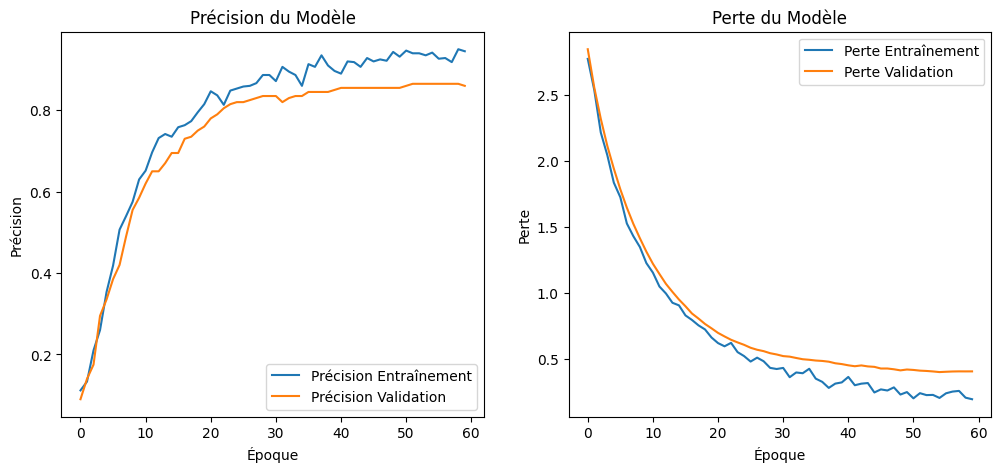

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8099 - loss: 0.4827
Perte Test : 0.4005
Précision Test : 0.8650


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

DATA_DIR = 'data/flowers/'
TRAIN_DIR = DATA_DIR + 'train'
TEST_DIR = DATA_DIR + 'test'

train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagenerator = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagenerator.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    color_mode='rgb'
)

validation_generator = validation_datagenerator.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=16,
    shuffle=False,
    color_mode='rgb'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers[:-20]:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(train_generator.class_indices), activation='softmax')  
])

model.compile(
    optimizer=Adam(learning_rate=1e-5), 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
]

model.summary()

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.title('Précision du Modèle')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Perte du Modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.show()

loss, accuracy = model.evaluate(validation_generator)
print(f"Perte Test : {loss:.4f}")
print(f"Précision Test : {accuracy:.4f}")